In [1]:
import numpy as np
from tqdm import tqdm
from src.document_db import DocumentsDB
import matplotlib.pyplot as plt

random_index = np.random.randint(0, 99)
dataset_size = []
load_speed = []
preprocess_speed = []
matrix_build_speed = []
inverted_index_build_speed = []
sequential_search_speed = []
inverted_index_search_speed = []
memory_usage = []
inverted_memory_usage = [] 

search_count = 5
for i in tqdm(range(100, 7001, 500)):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv", use_inverted_index=False)
    
    search_indexes = []
    
    search_speeds_sequential = []
    for _ in range(search_count):
        random_index = np.random.randint(0, len(db.full_documents) - 1)
        search_indexes.append(random_index)
        similar_documents = db.get_similar_documents(random_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_sequential.append(speed_info.search_speed)
    average_search_speed_sequential = sum(search_speeds_sequential) / len(search_speeds_sequential)
    
    search_speeds_inverted = []
    db.use_inverted_index = True
    for search_index in search_indexes:
        similar_documents = db.get_similar_documents(search_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_inverted.append(speed_info.search_speed)
    average_search_speed_inverted = sum(search_speeds_inverted) / len(search_speeds_inverted)
    
    speed_info = db.get_speed_statistics()        
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    sequential_search_speed.append(average_search_speed_sequential)
    inverted_index_search_speed.append(average_search_speed_inverted)
    matrix_memory, inverted_index_memory = db.get_memory_usage()
    memory_usage.append(matrix_memory)
    inverted_memory_usage.append(inverted_index_memory)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/senyaaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/senyaaa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/senyaaa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 14/14 [06:50<00:00, 29.31s/it]


In [5]:
for i in tqdm(range(10000, 12501, 500)):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv", use_inverted_index=False)
    
    search_indexes = []
    
    search_speeds_sequential = []
    for _ in range(search_count):
        random_index = np.random.randint(0, len(db.full_documents) - 1)
        search_indexes.append(random_index)
        similar_documents = db.get_similar_documents(random_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_sequential.append(speed_info.search_speed)
    average_search_speed_sequential = sum(search_speeds_sequential) / len(search_speeds_sequential)
    
    search_speeds_inverted = []
    db.use_inverted_index = True
    for search_index in search_indexes:
        similar_documents = db.get_similar_documents(search_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_inverted.append(speed_info.search_speed)
    average_search_speed_inverted = sum(search_speeds_inverted) / len(search_speeds_inverted)
            
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    sequential_search_speed.append(average_search_speed_sequential)
    inverted_index_search_speed.append(average_search_speed_inverted)
    matrix_memory, inverted_index_memory = db.get_memory_usage()
    memory_usage.append(matrix_memory)
    inverted_memory_usage.append(inverted_index_memory)

100%|██████████| 6/6 [10:02<00:00, 100.47s/it]


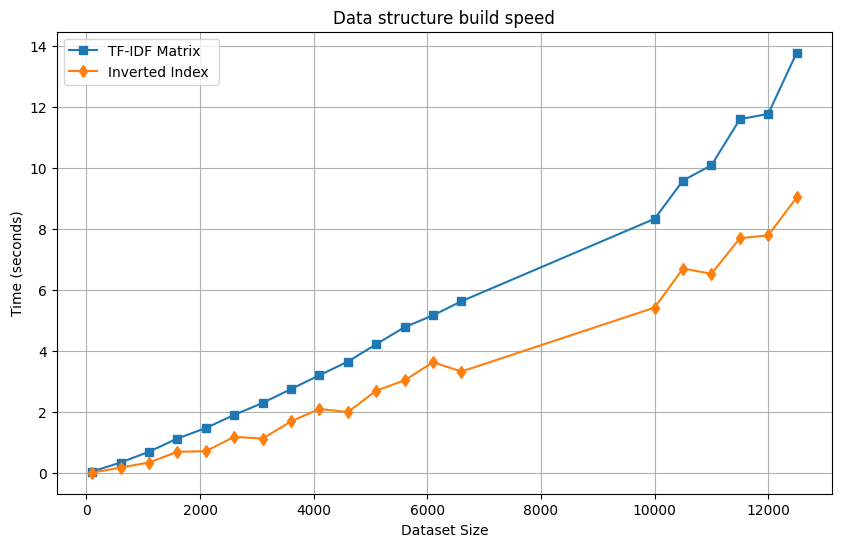

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, matrix_build_speed, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_index_build_speed, label="Inverted Index ", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Data structure build speed")
plt.legend()
plt.grid(True)

plt.show()

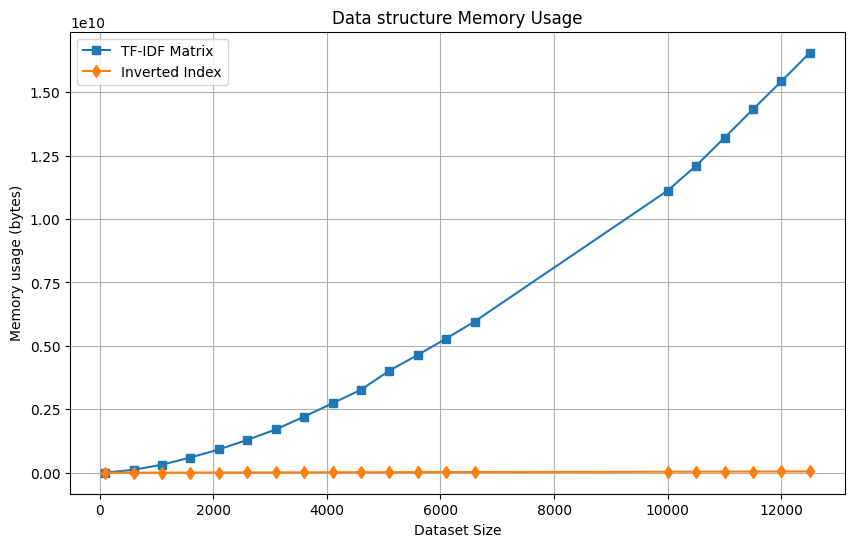

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, memory_usage, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_memory_usage, label="Inverted Index", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Memory usage (bytes)")
plt.title("Data structure Memory Usage")
plt.legend()
plt.grid(True)

plt.show()

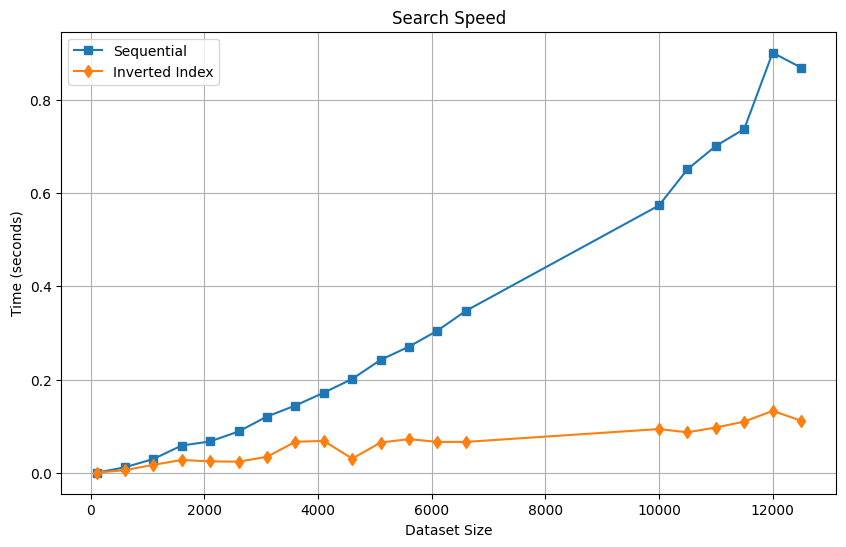

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_size, sequential_search_speed, label="Sequential", marker="s")
plt.plot(dataset_size, inverted_index_search_speed, label="Inverted Index", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Search Speed")
plt.legend()
plt.grid(True)

plt.show()

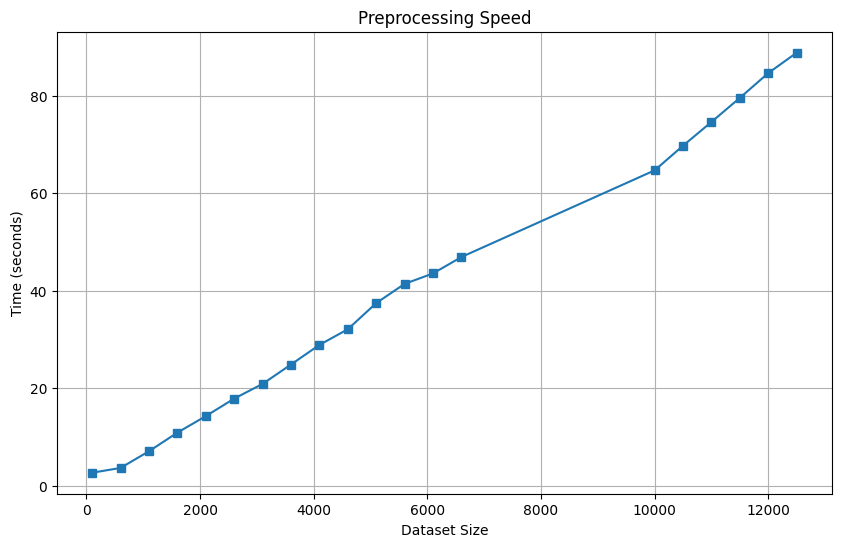

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, preprocess_speed, label="Preprocessing Speed", marker="s")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Preprocessing Speed")
plt.grid(True)

plt.show()